IMPORT THE LIBRARY

In [1]:
#!pip install ultralytics==8.2.103 -q

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.103  Python-3.10.0 torch-2.5.1+cpu CPU (11th Gen Intel Core(TM) i5-11400H 2.70GHz)
Setup complete  (12 CPUs, 15.8 GB RAM, 355.0/931.5 GB disk)


In [2]:
from ultralytics import YOLO

from IPython.display import display, Image

DOWNLOAD YOUR ANNOTATED DATASET

In [3]:
#!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Hv1VVOh68gGRBEamlwFI")
project = rf.workspace("saurabhs-datasets").project("eyes_detection-lpf2s")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to eyes_detection-1 in yolov8:: 100%|██████████| 36/36 [00:00<00:00, 4081.94it/s]


TRAIN YOUR CUSTOM DATASET MODEL !  

In [11]:
!yolo task=detect mode=train model=yolov8s.pt data=D:/OPENCV/deep_learning_cv/eyes_detection-1/data.yaml epochs=8 imgsz=800 plots=True

New https://pypi.org/project/ultralytics/8.3.28 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.10.0 torch-2.5.1+cpu CPU (11th Gen Intel Core(TM) i5-11400H 2.70GHz)
engine\trainer: task=detect, mode=train, model=yolov8s.pt, data=D:/OPENCV/deep_learning_cv/eyes_detection-1/data.yaml, epochs=8, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina


train: Scanning D:\OPENCV\deep_learning_cv\eyes_detection-1\train\labels.cache... 8 images, 0 backgrounds, 0 corrupt: 100%|██████████| 8/8 [00:00<?, ?it/s]
train: Scanning D:\OPENCV\deep_learning_cv\eyes_detection-1\train\labels.cache... 8 images, 0 backgrounds, 0 corrupt: 100%|██████████| 8/8 [00:00<?, ?it/s]

val: Scanning D:\OPENCV\deep_learning_cv\eyes_detection-1\valid\labels.cache... 3 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3/3 [00:00<?, ?it/s]
val: Scanning D:\OPENCV\deep_learning_cv\eyes_detection-1\valid\labels.cache... 3 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]
        1/8         0G      2.445      15.45      1.751         14        800:   0%|          | 0/1 [00:07<?, ?it/s]
        1/8         0G      2.445      15.45      1.751         14        800: 100%|██████████| 1/1 [00:07<00:00,  7.94s/it]
        1/8         0G      2.445      15.45      1.751         14        800: 100%|██████████| 1

VIEW THE CONFUSION MATRIX

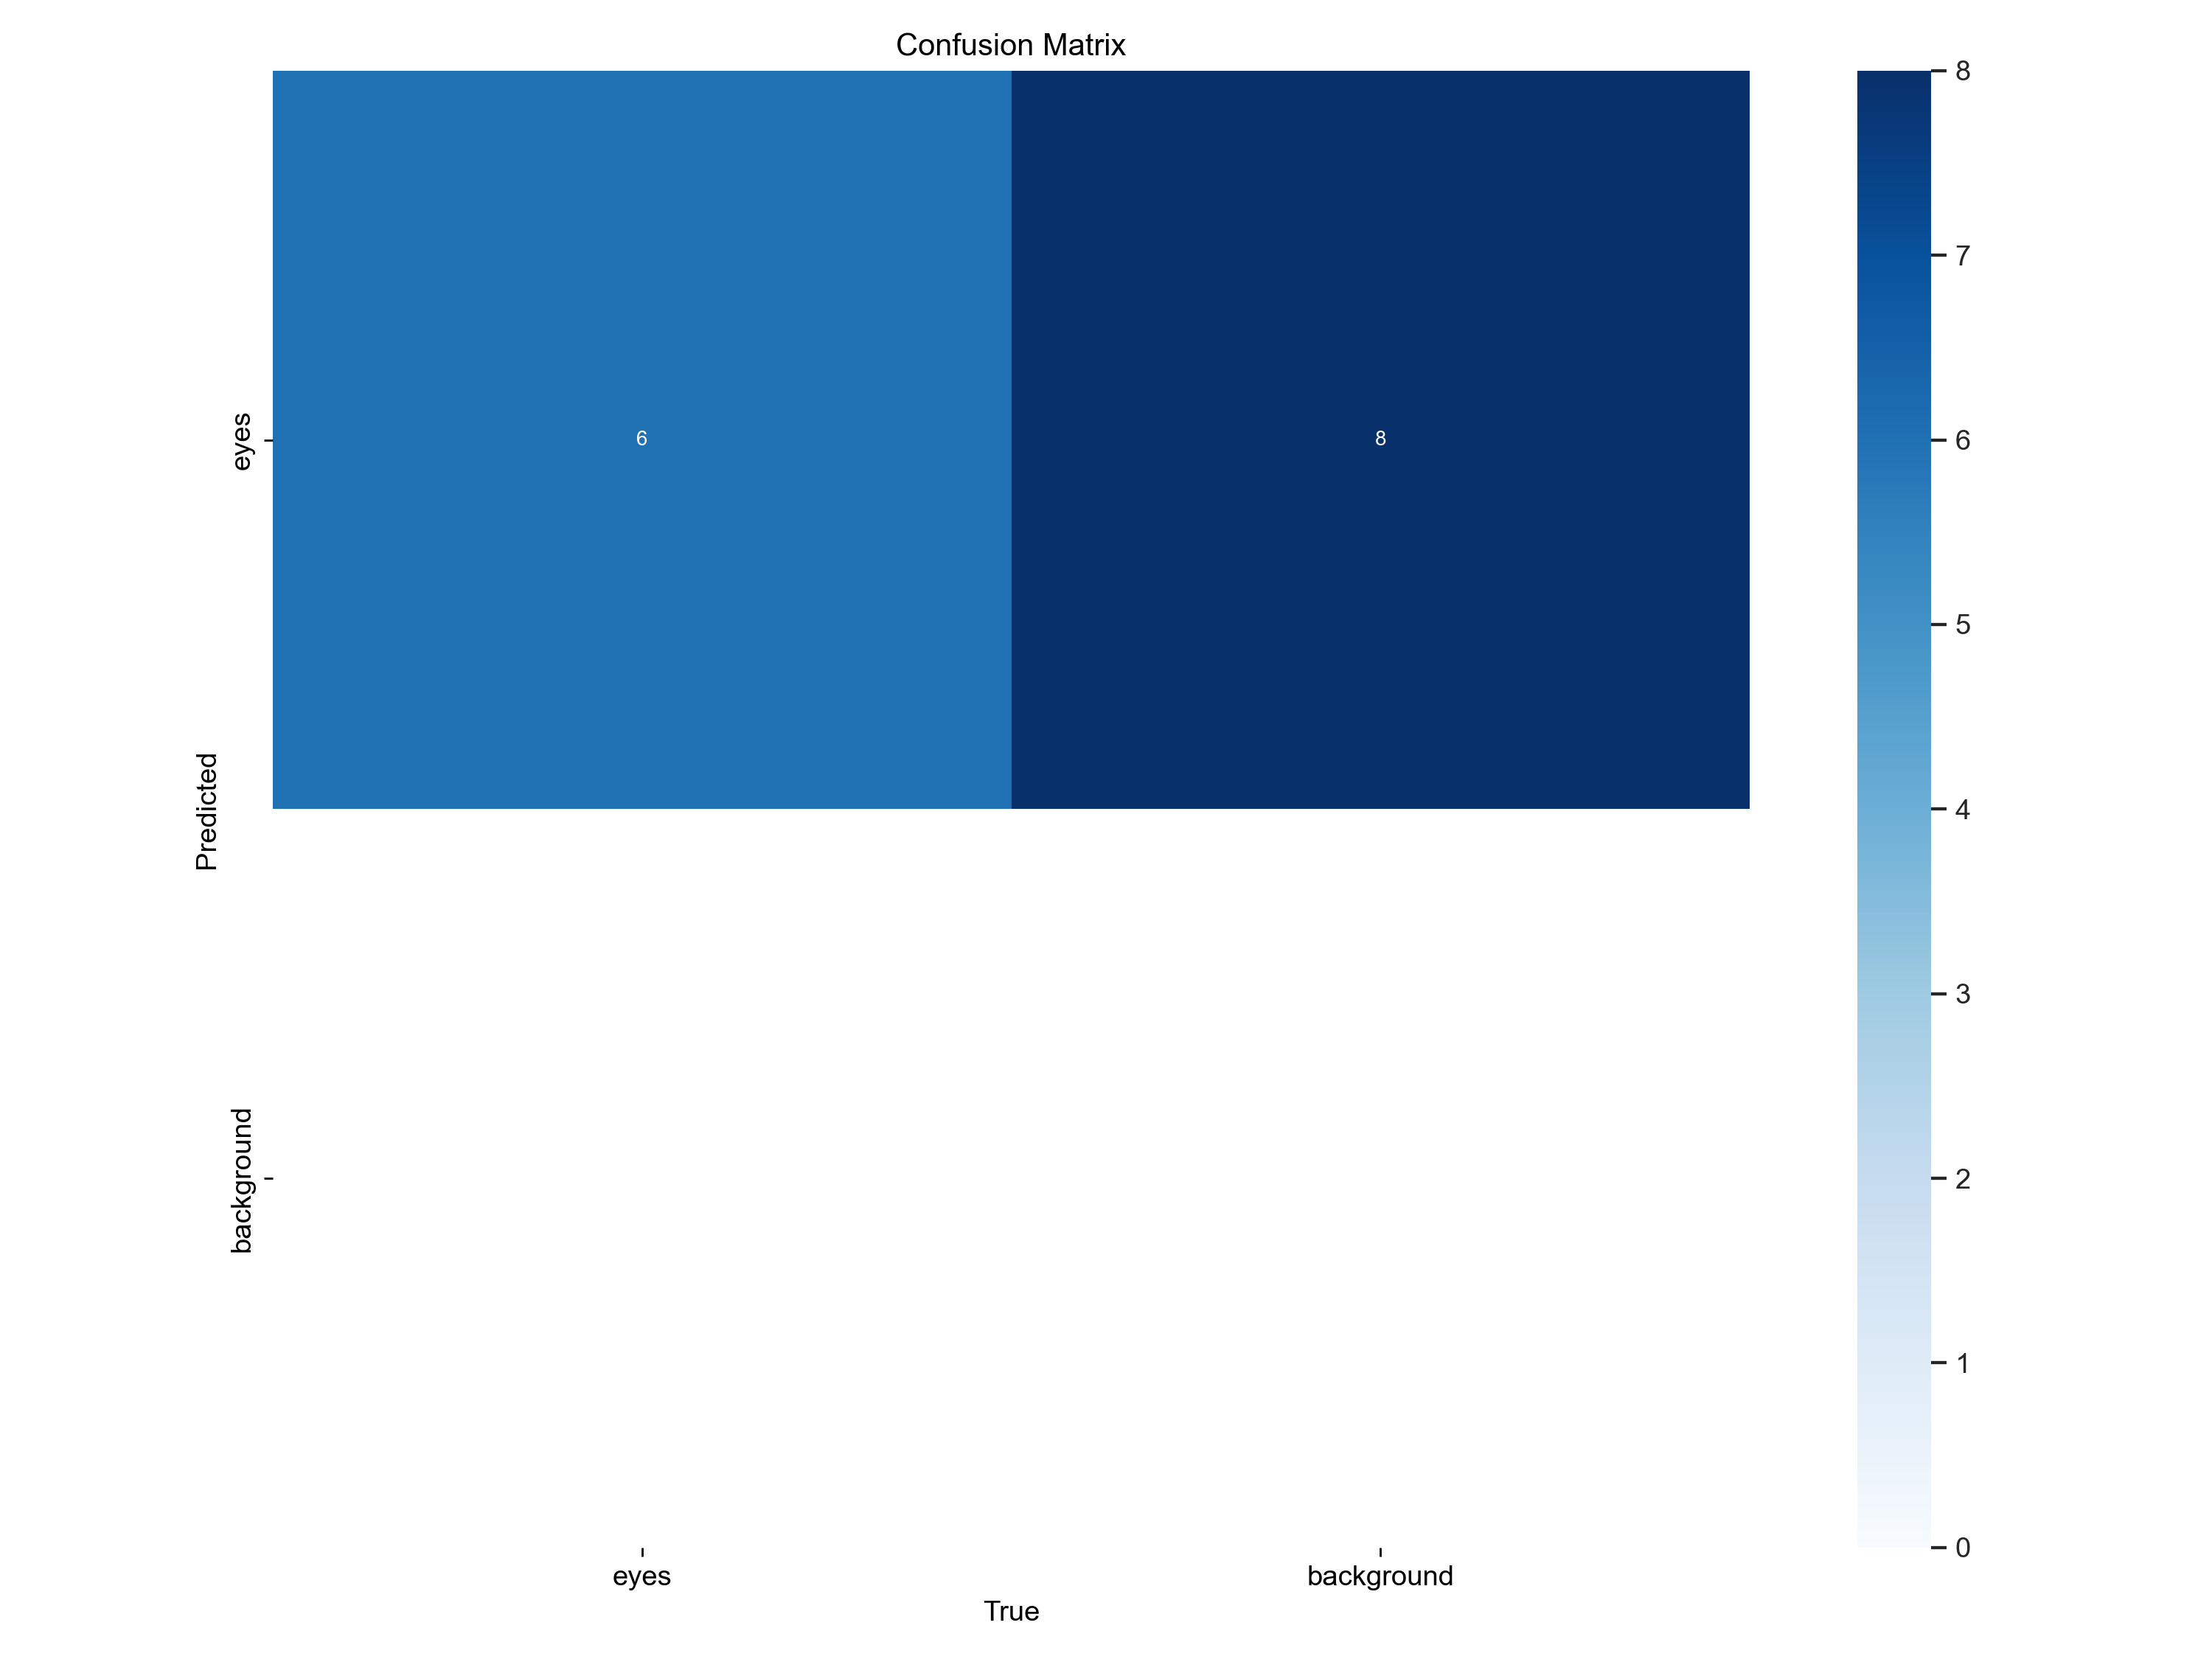

In [13]:
Image(filename='D:/OPENCV/deep_learning_cv/runs/detect/train/confusion_matrix.png', width=600)

VIEW THE METRICS

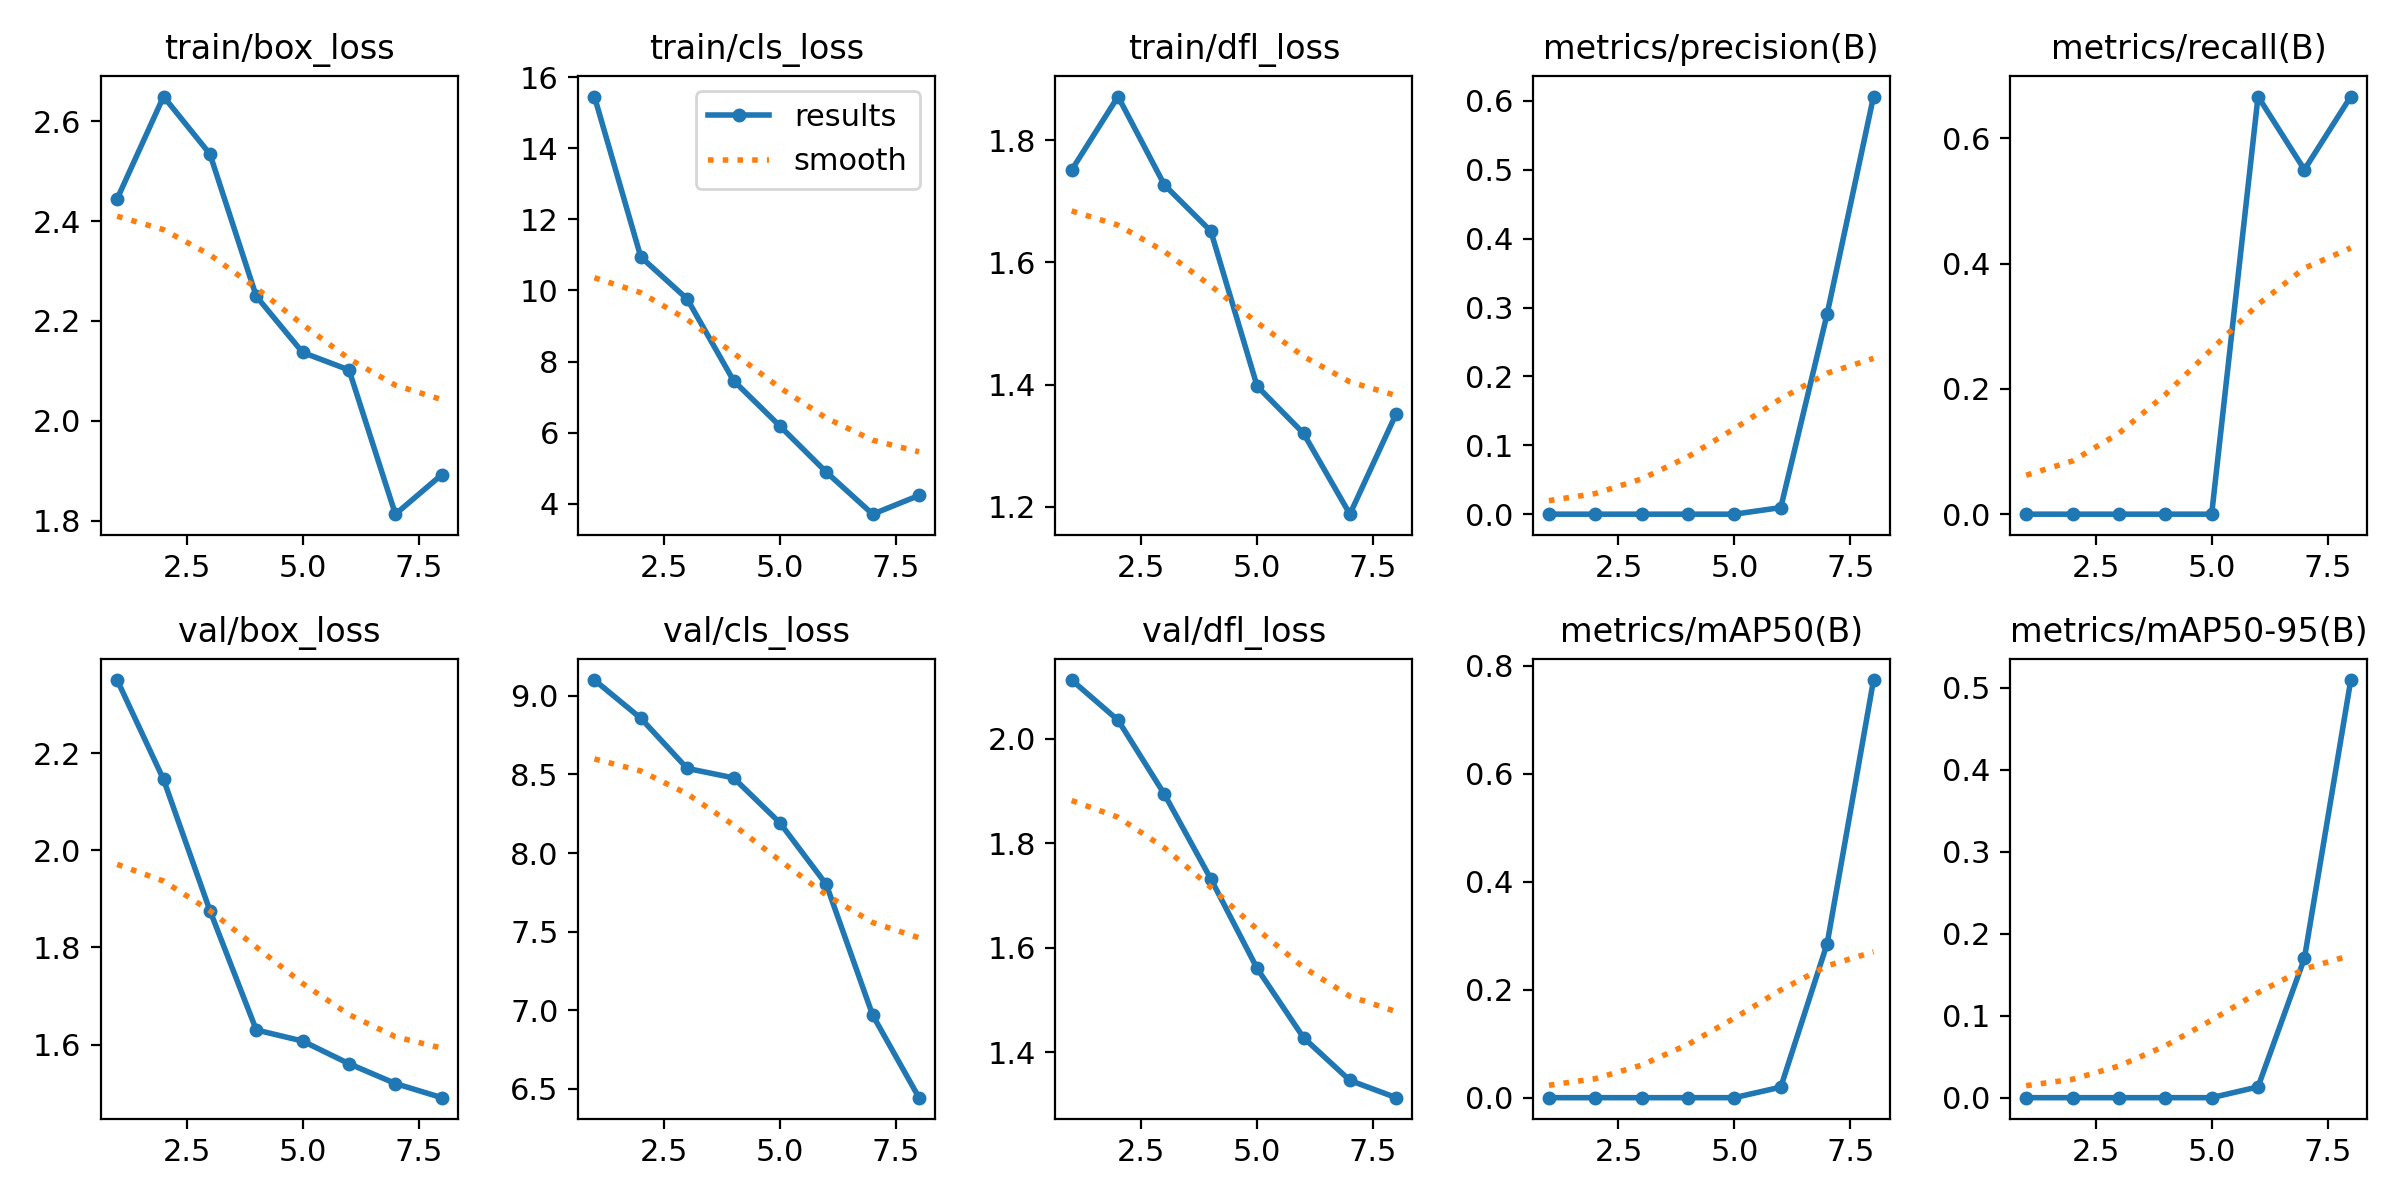

In [14]:
Image(filename='D:/OPENCV/deep_learning_cv/runs/detect/train/results.png', width=600)

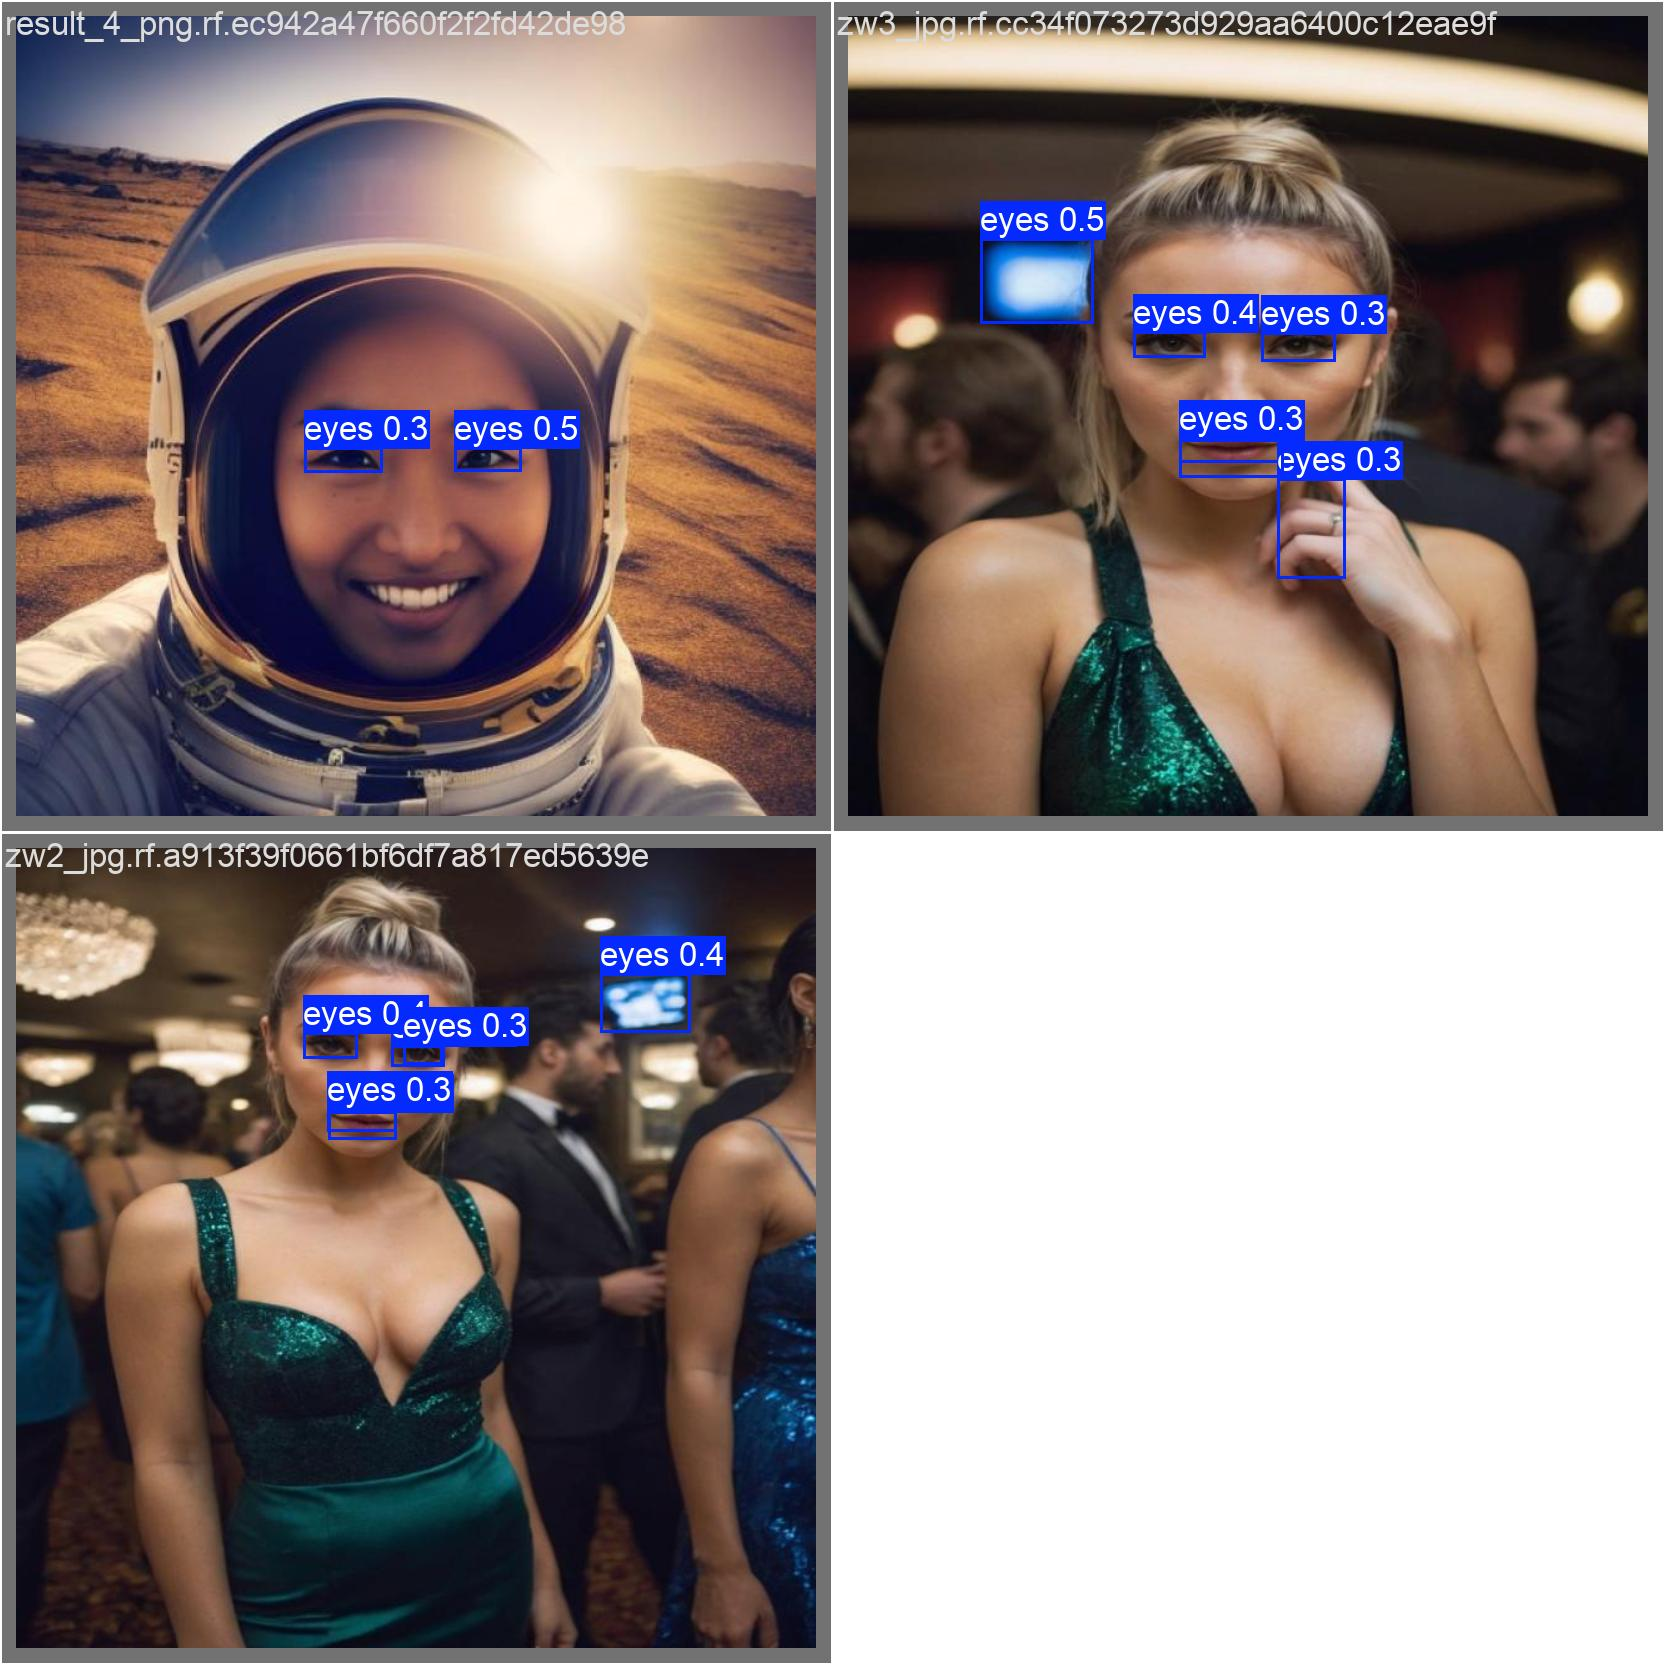

In [15]:
Image(filename='D:/OPENCV/deep_learning_cv/runs/detect/train/val_batch0_pred.jpg', width=600)

TEST ON VALIDATION DATASET

In [16]:
!yolo task=detect mode=val model=D:/OPENCV/deep_learning_cv/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics YOLOv8.2.103 🚀 Python-3.10.0 torch-2.5.1+cpu CPU (11th Gen Intel Core(TM) i5-11400H 2.70GHz)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs
                   all          3          6      0.602      0.667      0.767      0.495
Speed: 1.5ms preprocess, 238.0ms inference, 0.0ms loss, 22.5ms postprocess per image
Results saved to runs\detect\val2
💡 Learn more at https://docs.ultralytics.com/modes/val



val: Scanning D:\OPENCV\deep_learning_cv\eyes_detection-1\valid\labels.cache... 3 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3/3 [00:00<?, ?it/s]
val: Scanning D:\OPENCV\deep_learning_cv\eyes_detection-1\valid\labels.cache... 3 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3/3 [00:00<?, ?it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.23it/s]


INFERENCE MODE

Note: You can lower the conf parameter to ignore false positive bounding boxes

In [18]:
!yolo task=detect mode=predict model=D:/OPENCV/deep_learning_cv/runs/detect/train/weights/best.pt conf=0.4 source={dataset.location}/test/images save=True

Ultralytics YOLOv8.2.103 🚀 Python-3.10.0 torch-2.5.1+cpu CPU (11th Gen Intel Core(TM) i5-11400H 2.70GHz)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 d:\OPENCV\deep_learning_cv\eyes_detection-1\test\images\result_3_png.rf.082c67e30a581f56f28b4a7377ac03c7.jpg: 800x800 2 eyess, 226.0ms
Speed: 5.0ms preprocess, 226.0ms inference, 1.0ms postprocess per image at shape (1, 3, 800, 800)
Results saved to runs\detect\predict3
💡 Learn more at https://docs.ultralytics.com/modes/predict


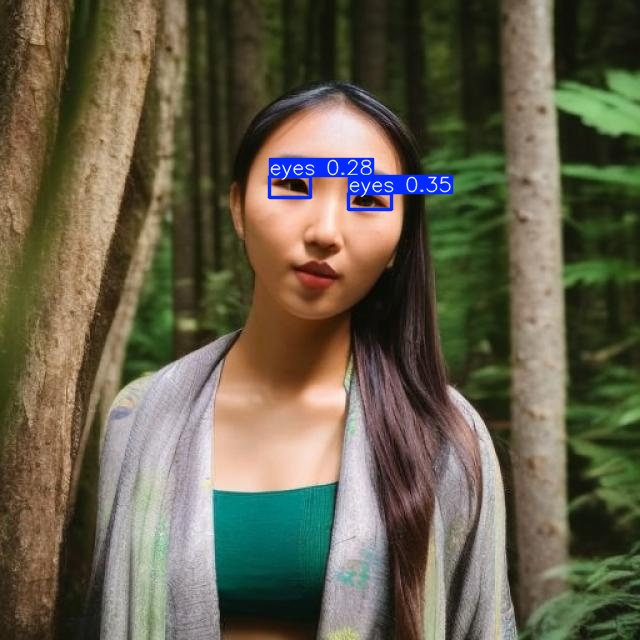

In [20]:
import glob
import os
from IPython.display import Image, display


base_path = 'D:/OPENCV/deep_learning_cv/runs/detect/'


subfolders = [os.path.join(base_path, d) for d in os.listdir(base_path)
              if os.path.isdir(os.path.join(base_path, d)) and d.startswith('predict2')]


latest_folder = max(subfolders, key=os.path.getmtime)

image_paths = glob.glob(f'{latest_folder}/*.jpg')[:3]


for image_path in image_paths:
    display(Image(filename=image_path, width=600))
    print("\n")

INFER ON VIDEOS WITH AUGMENTATION

In [3]:
!yolo task=detect mode=predict model=D:/OPENCV/deep_learning_cv/runs/detect/train/weights/best.pt conf=0.9 augment=True source=D:/OPENCV/drummer.avi

Ultralytics YOLOv8.2.103 🚀 Python-3.10.0 torch-2.5.1+cpu CPU (11th Gen Intel Core(TM) i5-11400H 2.70GHz)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs

video 1/1 (frame 1/466) D:\OPENCV\drummer.avi: 480x800 (no detections), 609.1ms
video 1/1 (frame 2/466) D:\OPENCV\drummer.avi: 480x800 (no detections), 465.9ms
video 1/1 (frame 3/466) D:\OPENCV\drummer.avi: 480x800 (no detections), 497.7ms
video 1/1 (frame 4/466) D:\OPENCV\drummer.avi: 480x800 (no detections), 482.1ms
video 1/1 (frame 5/466) D:\OPENCV\drummer.avi: 480x800 (no detections), 456.1ms
video 1/1 (frame 6/466) D:\OPENCV\drummer.avi: 480x800 (no detections), 480.7ms
video 1/1 (frame 7/466) D:\OPENCV\drummer.avi: 480x800 (no detections), 499.6ms
video 1/1 (frame 8/466) D:\OPENCV\drummer.avi: 480x800 (no detections), 465.0ms
video 1/1 (frame 9/466) D:\OPENCV\drummer.avi: 480x800 (no detections), 481.2ms
video 1/1 (frame 10/466) D:\OPENCV\drummer.avi: 480x800 (no detections), 481.5ms
video 1/1 

WEBCAM DETECTION

In [3]:
!yolo task=detect mode=predict model=D:/OPENCV/deep_learning_cv/runs/detect/train/weights/best.pt conf=0.5 augment=True source=0

^C


UPLOAD YOUR MODEL TO ROBOFLOW CLOUD

In [17]:
project.version(dataset.version).deploy(model_type="yolov8", model_path="/content/runs/detect/train2")

Dependency ultralytics==8.0.196 is required but found version=8.2.103, to fix: `pip install ultralytics==8.0.196`
Would you like to continue with the wrong version of ultralytics? y/n: y
View the status of your deployment at: https://app.roboflow.com/saurabhs-datasets/eyes_detection-lpf2s/1
Share your model with the world at: https://universe.roboflow.com/saurabhs-datasets/eyes_detection-lpf2s/model/1
